## Importing the libraries

In [1]:
# Numpy is used for numerical computations and working with arrays
import numpy as np
#Pandas is used for data manipulation and analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [2]:
# Read the CSV Dataset file
df = pd.read_csv('Restaurant_Reviews.csv')

## Data Analysis

In [3]:
df.shape

(1000, 2)

In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
df.sample(5)

,Review,Liked
239,"Everyone is very attentive, providing excellen...",1
893,Worst Thai ever.,0
895,I want to first say our server was great and w...,1
802,Why are these sad little vegetables so overcoo...,0
351,He was terrible!,0


In [10]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [11]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

# Feature Engineering

In [12]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


# Data Preprocessing

In [13]:
# Importing the NLP Libraries
import nltk
import re
# Download NLTK stopwords data
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Cleaning the Reviews and Creating a Corpus
corpus = []  # Initialize an empty list to store the cleaned reviews.

# Loop through each review
for i in range(len(df)):
    # Clean and preprocess the review
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])  # Remove non-alphabetical characters
    review = review.lower()  # Convert text to lowercase
    review_words = review.split()  # Tokenization
    review_words = [word for word in review_words if word not in set(stopwords.words('english'))]  # Remove Stop Words
    review_words = [stemmer.stem(word) for word in review_words]  # Stemming
    review = ' '.join(review_words)  # Rejoin Tokens
    corpus.append(review)  # Append to Corpus

In [16]:
corpus[:15]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair']

<AxesSubplot:xlabel='Liked', ylabel='count'>

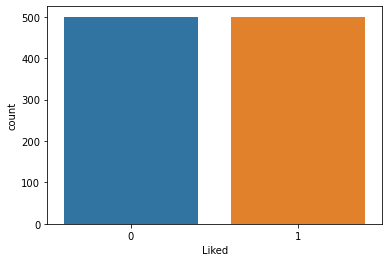

In [17]:
sns.countplot(data=df, x = 'Liked', label='Review')

# Creating a Bag of Words Model

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=1500, min_df=2)
X = tf.fit_transform(corpus).toarray()
y = df['Liked'].values

# Data Splitting

In [19]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 693), (200, 693), (800,), (200,))

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

# Model Training

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Model-1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=4, min_samples_leaf=2, random_state=41)

train_accuracies_rf = []
test_accuracies_rf = []

rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_accuracies_rf.append(train_accuracy_rf)
test_accuracies_rf.append(test_accuracy_rf)

average_train_accuracy_rf = np.mean(train_accuracies_rf)
average_test_accuracy_rf = np.mean(test_accuracies_rf)
accuracy_difference_rf = abs(average_train_accuracy_rf - average_test_accuracy_rf)


# Model-2: Support Vector Classifier (SVC)
classifier = SVC(kernel='linear', C=0.1, random_state=42)

train_accuracies_svc = []
test_accuracies_svc = []

classifier.fit(X_train, y_train)
y_train_pred_svc = classifier.predict(X_train)
y_test_pred_svc = classifier.predict(X_test)

test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)

train_accuracies_svc.append(train_accuracy_svc)
test_accuracies_svc.append(test_accuracy_svc)

average_train_accuracy_svc = np.mean(train_accuracies_svc)
average_test_accuracy_svc = np.mean(test_accuracies_svc)
accuracy_difference_svc = abs(average_train_accuracy_svc - average_test_accuracy_svc)



# Model Evaluation

Model-1 :: RandomForestClassifier
Training Accuracy: 81.12%
Testing Accuracy: 74.50%
Accuracy Difference: 6.63%


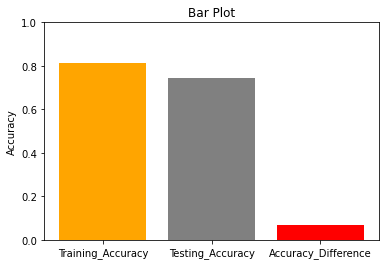

In [23]:
print("Model-1 :: RandomForestClassifier")
print(f"Training Accuracy: {average_train_accuracy_rf * 100:.2f}%")
print(f"Testing Accuracy: {average_test_accuracy_rf * 100:.2f}%")
print("Accuracy Difference: {:.2f}%".format(accuracy_difference_rf * 100))

# Create a bar plot
categories = ['Training_Accuracy', 'Testing_Accuracy', 'Accuracy_Difference']
values = [average_train_accuracy_rf, average_test_accuracy_rf, accuracy_difference_rf]
plt.bar(categories, values, color=['orange', 'grey', 'red'])
plt.title('Bar Plot')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

In [24]:
print("Confusion Matrix of RandomForest :")
confusion_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print(confusion_matrix_rf)

Confusion Matrix of RandomForest :
[[86 17]
 [34 63]]


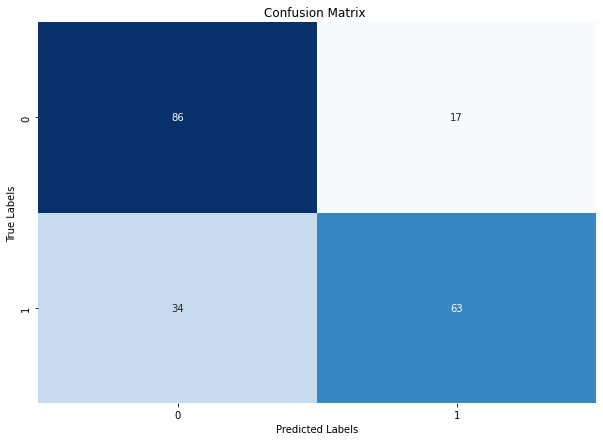

In [25]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix ")
plt.show()

model-2 :: SVC
Training Accuracy: 80.00%
Testing Accuracy: 78.00%
Accuracy Difference: 2.00%


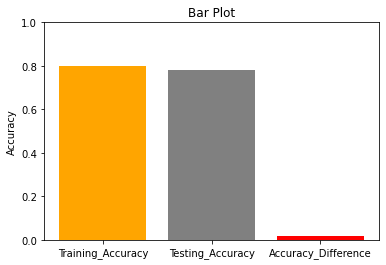

In [26]:
print("model-2 :: SVC")
print(f"Training Accuracy: {average_train_accuracy_svc * 100:.2f}%")
print(f"Testing Accuracy: {average_test_accuracy_svc * 100:.2f}%")
print("Accuracy Difference: {:.2f}%".format(accuracy_difference_svc * 100))

# Create a bar plot
categories = ['Training_Accuracy', 'Testing_Accuracy', 'Accuracy_Difference']
values = [average_train_accuracy_svc, average_test_accuracy_svc, accuracy_difference_svc]
plt.bar(categories, values, color=['orange', 'grey', 'red'])
plt.title('Bar Plot')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

In [27]:
print("Confusion Matrix of SVC")
confusion_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
print(confusion_matrix_svc)

Confusion Matrix of SVC
[[95  8]
 [36 61]]


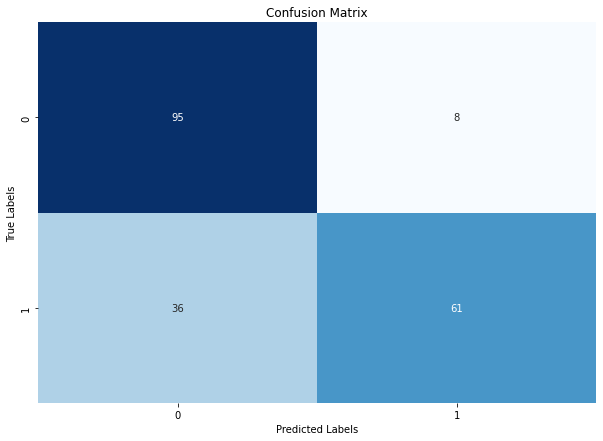

In [28]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Predictions

In [29]:
def predict_sentiment(sample_review, classifier, tf):    
    X =  tf.transform([review]).toarray()
    # Use the pre-trained classifier to predict sentiment
    sentiment = classifier.predict(X)

    # Post-processing: Check for positive words
    positive_words = ["good", "excellent", "amazing", "delicious"]  # Add more positive words as needed
    for word in positive_words:
        if word in sample_review.lower():
            sentiment = [1]  # Override sentiment to positive

    return sentiment[0]

# Sample reviews as strings
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

In [30]:
for review in reviews:
    sentiment = predict_sentiment(review, classifier, tf)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()

Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: POSITIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE

